In [1]:
import pandas as pd
import numpy as np

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import pickle

In [3]:
data = pd.read_csv("../EuroMillions_numbers.csv", sep = ';')

In [4]:
data.head()

,Date,N1,N2,N3,N4,N5,E1,E2,Winner,Gain
0,2004-12-24,3,27,29,4,37,6,5,1,10000000
1,2004-12-17,49,22,19,15,46,9,2,1,26215627
2,2004-11-26,24,1,34,4,36,8,6,1,43756502
3,2004-10-22,9,25,1,40,23,3,9,1,25059130
4,2004-01-10,48,20,45,21,12,6,5,1,29785269


In [5]:
type(data['Date'][1])

str

<AxesSubplot:xlabel='value'>

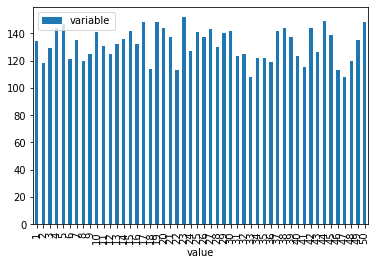

In [6]:
num = data[['N1', 'N2', 'N3', 'N4', 'N5']]
num = num.melt()
num = num.groupby('value').count()
num.plot.bar()

In [7]:
def oddEvenPatterns(t):
    nb = sum(1-n%2 for n in t)
    if ((nb==1) or (nb==4)):
        result = 0.1492618323925310
    elif ((nb == 3) or (nb==2)):
        result = 0.3256621797655230
    else:
        result = 0.0250759878419453
    return result

def lowHighPatterns(t):
    nb = sum(n<26 for n in t)
    if ((nb==1) or (nb==4)):
        result = 0.1492618323925310
    elif ((nb == 3) or (nb==2)):
        result = 0.3256621797655230
    else:
        result = 0.0250759878419453
    return result

def createRows(tirages, n=4):
    tirages_tmp = np.copy(tirages)
    l = []
    for t in tirages_tmp:
        tmp = np.copy(t[:5])
        t = np.append(t, [oddEvenPatterns(tmp)], axis=0)
        t = np.append(t, [lowHighPatterns(tmp)], axis=0)
        t = np.append(t, [1], axis=0)
        l.append(t)
    tirages_tmp = np.array(l)
    
    for tirage in tirages:
        
        array_numeros = tirage[:5]
        array_etoiles = tirage[-2:]
        
        for i in range(n):
            numeros_generation = np.random.choice(np.arange(1, 51), replace=False, size=(5,))
            while (np.sort(array_numeros) == np.sort(numeros_generation)).all():
                numeros_generation = np.random.choice(np.arange(1, 51), replace=False, size=(5,))
            
            etoiles_generation = np.random.choice(np.arange(1, 13), replace=False, size=(2,))
            while (np.sort(array_etoiles) == np.sort(etoiles_generation)).all():
                etoiles_generation = np.random.choice(np.arange(1, 13), replace=False, size=(2,))
                
            row_to_append = np.concatenate((numeros_generation, etoiles_generation), axis=0)
            row_to_append = np.concatenate((row_to_append, [oddEvenPatterns(numeros_generation)]), axis=0)
            row_to_append = np.concatenate((row_to_append, [lowHighPatterns(numeros_generation)]), axis=0)
            row_to_append = np.concatenate((row_to_append, [0]), axis=0)
            
            tirages_tmp = np.append(tirages_tmp, [row_to_append], axis=0)
            
    return tirages_tmp

tirages = data[["N1", "N2", "N3", "N4", "N5", "E1", "E2"]].to_numpy()
tirages =createRows(tirages, 9)

In [242]:
def createRows(tirages, n=4):
    tirages_tmp = np.copy(tirages)
    l = []
    for t in tirages_tmp:
        t = np.append(t, [1], axis=0)
        l.append(t)
    tirages_tmp = np.array(l)
    
    for tirage in tirages:
        
        array_numeros = tirage[:5]
        array_etoiles = tirage[-2:]
        
        for i in range(n):
            numeros_generation = np.random.choice(np.arange(1, 51), replace=False, size=(5,))
            while (np.sort(array_numeros) == np.sort(numeros_generation)).all():
                numeros_generation = np.random.choice(np.arange(1, 51), replace=False, size=(5,))
            
            etoiles_generation = np.random.choice(np.arange(1, 13), replace=False, size=(2,))
            while (np.sort(array_etoiles) == np.sort(etoiles_generation)).all():
                etoiles_generation = np.random.choice(np.arange(1, 13), replace=False, size=(2,))
                
            row_to_append = np.concatenate((numeros_generation, etoiles_generation), axis=0)
            row_to_append = np.concatenate((row_to_append, [0]), axis=0)
            
            tirages_tmp = np.append(tirages_tmp, [row_to_append], axis=0)
            
    return tirages_tmp



tirages = data[["N1", "N2", "N3", "N4", "N5", "E1", "E2"]].to_numpy()
tirages =createRows(tirages)

In [8]:
X = []
y = []
for i in range(tirages.shape[0]):
    X.append((tirages[i][0:-1]).tolist())
    y.append(tirages[i][-1].tolist())

X = np.array(X)
y = np.array(y)
print(y)


X, y = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

print(y_train)
print(X_train[0])



[1. 1. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[24.          1.         34.          4.         36.          8.
  6.          0.14926183  0.32566218]


In [9]:
model = SVC(probability=True)
model.fit(X_train, y_train)

result = model.predict_proba(X_test)

res1 = []
for i in range(len(y_test)):
    if y_test[i] == 1:
        res1.append(result[i][1])

res1 = np.array(res1)     
threshold = np.median(res1)

y_pred = []

for i in range(len(result)):
    if result[i][1] > threshold:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[2784 1098]
 [ 234  234]]
0.26
0.6937931034482758


In [10]:
# save the model to disk
filename = 'SVC.sav'
pickle.dump(model, open(filename, 'wb'))

In [13]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict_proba(X_test)

res1 = []
for i in range(len(y_test)):
    if y_test[i] == 1:
        res1.append(result[i][1])

res1 = np.array(res1)     
threshold = np.median(res1)

y_pred = []

for i in range(len(result)):
    if result[i][1] > threshold:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[2784 1098]
 [ 234  234]]
0.26
0.6937931034482758


In [299]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
result2=clf.predict_proba(X_test)

res1 = []
for i in range(len(y_test)):
    if y_test[i] == 1:
        res1.append(result2[i][1])

res1 = np.array(res1)
threshold = np.median(res1)

y_pred = []

for i in range(len(result2)):
    if result2[i][1] > threshold:
        y_pred.append(1)
    else:
        y_pred.append(0)


print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[2964  918]
 [ 242  226]]
0.2803970223325062
0.7333333333333333


In [303]:
from fastapi import FastAPI
from typing import Optional
from pydantic import BaseModel, Field
from datetime import datetime


class Draw(BaseModel):
    Date : Optional[datetime] = Field(None, description = "date time format exiged YYYY-MM-DD")
    N1 : int = Field(..., gt = 0, lt = 51 , description = ' N1 must be an INT between 1 and 50 (included)')
    N2 : int = Field(..., gt = 0, lt = 51 , description = ' N2 must be an INT between 1 and 50 (included)')
    N3 : int = Field(..., gt = 0, lt = 51 , description = ' N3 must be an INT between 1 and 50 (included)')
    N4 : int = Field(..., gt = 0, lt = 51 , description = ' N4 must be an INT between 1 and 50 (included)')
    N5 : int = Field(..., gt = 0, lt = 51 , description = ' N5 must be an INT between 1 and 50 (included)')
    E1 : int = Field(..., gt = 0, lt = 13 , description = ' E1 must be an INT between 1 and 12 (included)')
    E2 : int = Field(..., gt = 0, lt = 13 , description = ' E2 must be an INT between 1 and 12 (included)')
    Winner : Optional[int] = Field(None, ge = 0, description = 'nb of winner must be an INT > 0')
    Gain : Optional[int] = Field(..., ge = 0, description= " monney ammount should be an INT > 0 ")

app = FastAPI()




In [197]:
import itertools

iterator = np.arange(1,50)

a = list(itertools.combinations(iterator, 5))

In [200]:
print(len(a))

1906884


In [349]:
from typing import *

def addDrawToCsv(draw : Draw) -> None :
    df = pd.read_csv("../EuroMillions_numbers.csv", sep = ';')
    
    df_to_add = pd.DataFrame({'Date' : [draw.Date], 'N1':[draw.N1],'N2':[draw.N2],'N3':[draw.N3],'N4':[draw.N4],'N5':[draw.N5],'E1':[draw.E1],'E2':[draw.E2],'Winner':[draw.Winner], 'Gain':[draw.Gain]})
    df = df.append(df_to_add, ignore_index=True)
    
    df.to_csv(path_or_buf= '../EuroMillions_numbers.csv', sep = ';')
    
    
def     

In [347]:
data = pd.read_csv("../EuroMillions_numbers.csv", sep = ';')
new_row = pd.Series({
               'Date': '2020-02-12',
               'N1': 2,
               'N2': 35,
               'N3': 4,
               'N4': 12,
               'N5': 32,
               'E1': 5,
               'E2': 6,
               'Winner': 1,
               'Gain': 1000000})


18:47
Lucas
Lucas Ordronneau
df_to_add = pd.DataFrame({'Date' : ['2021-01-02'], 'N1':[4],'N2':[7],'N3':[13],'N4':[22],'N5':[34],'E1':[4],'E2':[8],'Winner':[1], 'Gain':[100000000]})
df = df.append(df_to_add, ignore_index=True)

a = np.array(['2020-01-21',1,2,3,4,5,1,2,1,1000])

data[['Date','N1','N2','N3','N4','N5','E1','E2','Winner','Gain']].append(a)



TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

array(['2004-12-24', 3, 27, 29, 4, 37, 6, 5, 1, 10000000], dtype=object)

In [329]:
data

,0,Date,E1,E2,Gain,N1,N2,N3,N4,N5,Winner,1,2,3,4,5,6,7,8,9
0,NaN,2004-12-24,6.0,5.0,10000000.0,3.0,27.0,29.0,4.0,37.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2004-12-17,9.0,2.0,26215627.0,49.0,22.0,19.0,15.0,46.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2004-11-26,8.0,6.0,43756502.0,24.0,1.0,34.0,4.0,36.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2004-10-22,3.0,9.0,25059130.0,9.0,25.0,1.0,40.0,23.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2004-01-10,6.0,5.0,29785269.0,48.0,20.0,45.0,21.0,12.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1327,1000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1328,2020-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,35.0,4.0,12.0,32.0,5.0,6.0,1.0,1000000.0
1329,NaN,2020-02-12,5.0,6.0,1000000.0,2.0,35.0,4.0,12.0,32.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
